# Data Exploration:

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, roc_curve

In [2]:
train_data = pd.read_csv(r"D:\Assignments Data Science ExcelR\Logistic Regression\Logistic Regression\Titanic_train.csv")
test_data = pd.read_csv(r"D:\Assignments Data Science ExcelR\Logistic Regression\Logistic Regression\Titanic_test.csv")

In [3]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [5]:
test_data

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [8]:
train_data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test_data.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [10]:
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


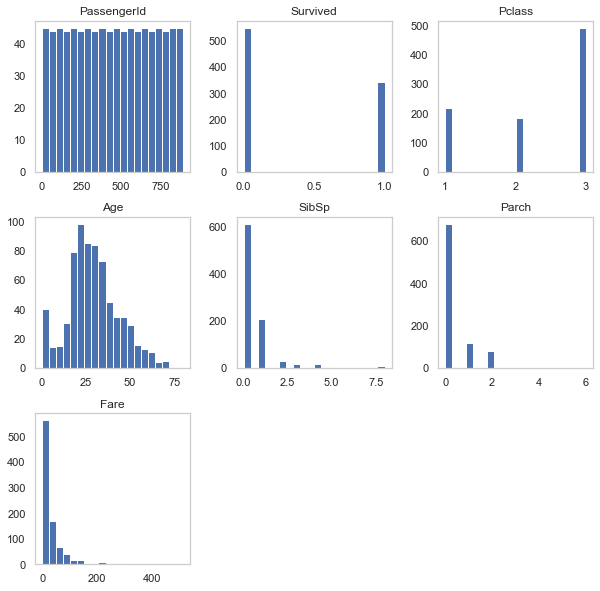

In [11]:
sns.set(style="whitegrid")
# Histograms for numerical features
train_data.hist(bins=20, figsize=(10, 10), grid=False)
plt.show()


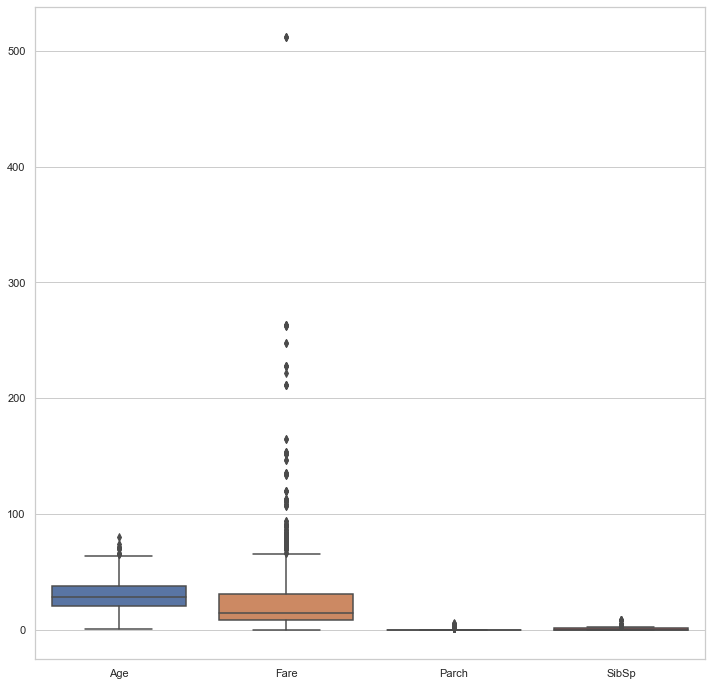

In [13]:
# Box plots for numerical features
plt.figure(figsize=(12, 12))
sns.boxplot(data=train_data[['Age', 'Fare', 'Parch', 'SibSp']])
plt.show()

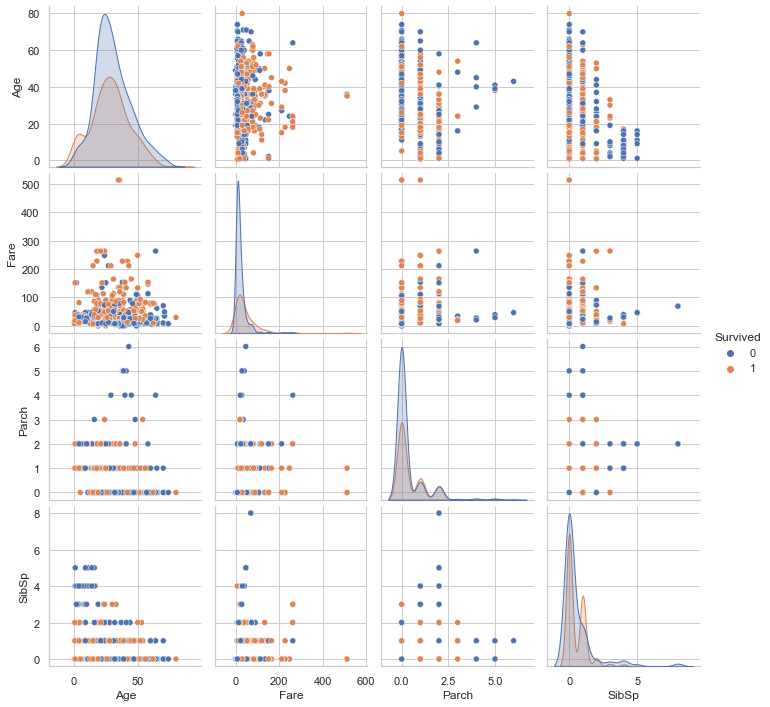

In [14]:
# Pair plot for visualizing relationships between features
sns.pairplot(train_data[['Age', 'Fare', 'Parch', 'SibSp', 'Survived']], hue='Survived')
plt.show()

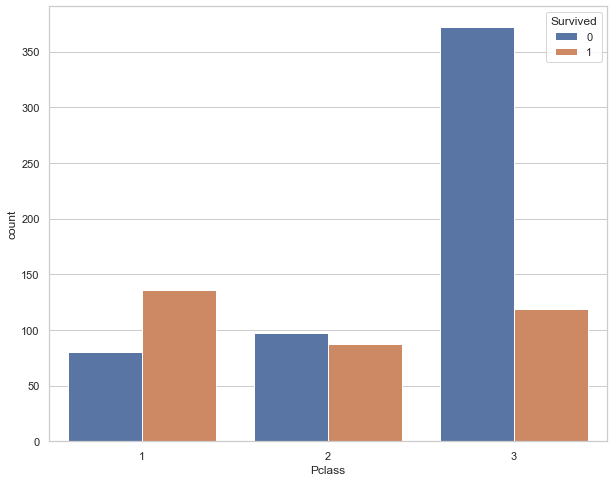

In [15]:
# Bar plot for categorical features
plt.figure(figsize=(10, 8))
sns.countplot(data=train_data, x='Pclass', hue='Survived')
plt.show()

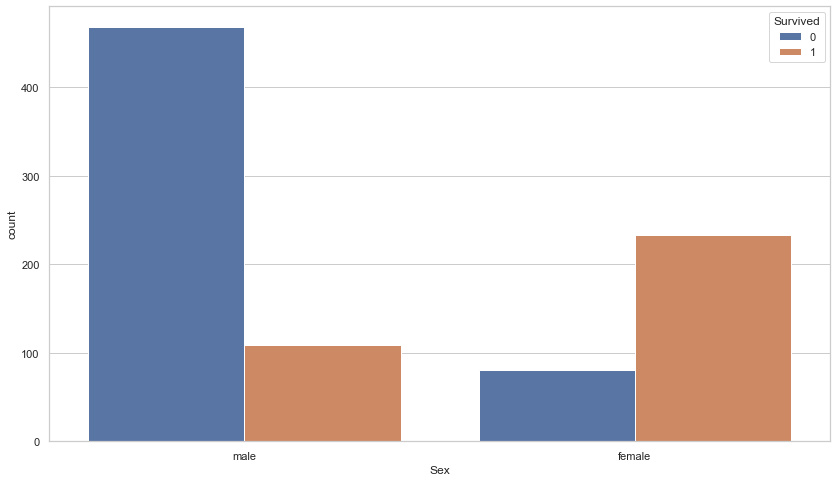

In [16]:
plt.figure(figsize=(14, 8))
sns.countplot(data=train_data, x='Sex', hue='Survived')
plt.show()

# Data Preprocessing:

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
train_data['Age'].fillna(train_data['Age'].median(), inplace=True)

In [19]:
train_data['Embarked'].fillna(train_data['Embarked'].mode()[0], inplace=True)

In [20]:
test_data['Age'].fillna(test_data['Age'].median(), inplace=True)

In [21]:
test_data['Fare'].fillna(test_data['Fare'].median(), inplace=True)

In [22]:
# Encode categorical variables
label_encoder = LabelEncoder()

In [23]:
train_data['Sex'] = label_encoder.fit_transform(train_data['Sex'])

In [24]:
train_data['Embarked'] = label_encoder.fit_transform(train_data['Embarked'])

In [25]:
test_data['Sex'] = label_encoder.fit_transform(test_data['Sex'])

In [26]:
test_data['Embarked'] = label_encoder.fit_transform(test_data['Embarked'])

In [27]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,2
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,2
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,2


In [28]:
test_data.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,2
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,1
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,2
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,2


In [29]:
numeric_features = train_data.select_dtypes(include=['int64', 'float64']).columns

# Calculate the correlation matrix
corr_matrix = train_data[numeric_features].corr()

# Display the correlation matrix
print(corr_matrix)


             PassengerId  Survived    Pclass       Age     SibSp     Parch  \
PassengerId     1.000000 -0.005007 -0.035144  0.034212 -0.057527 -0.001652   
Survived       -0.005007  1.000000 -0.338481 -0.064910 -0.035322  0.081629   
Pclass         -0.035144 -0.338481  1.000000 -0.339898  0.083081  0.018443   
Age             0.034212 -0.064910 -0.339898  1.000000 -0.233296 -0.172482   
SibSp          -0.057527 -0.035322  0.083081 -0.233296  1.000000  0.414838   
Parch          -0.001652  0.081629  0.018443 -0.172482  0.414838  1.000000   
Fare            0.012658  0.257307 -0.549500  0.096688  0.159651  0.216225   

                 Fare  
PassengerId  0.012658  
Survived     0.257307  
Pclass      -0.549500  
Age          0.096688  
SibSp        0.159651  
Parch        0.216225  
Fare         1.000000  


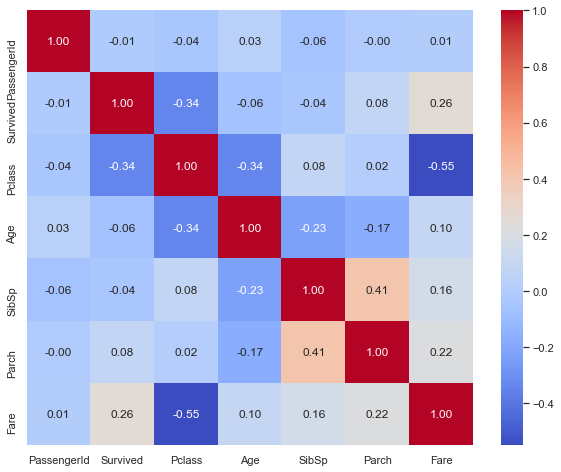

In [30]:
# Generate the heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

# Model Building:

In [31]:
# Select features and target
features = ['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare', 'Embarked']
X_train = train_data[features]
y_train = train_data['Survived']
X_test = test_data[features]

In [32]:
# Split the training data for model evaluation
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [33]:
# Initialize and train the logistic regression model
model = LogisticRegression(max_iter=200)
model.fit(X_train, y_train)

LogisticRegression(max_iter=200)

# Model Evaluation:

In [34]:

# Evaluate the model on the validation set
y_val_pred = model.predict(X_val)
y_val_proba = model.predict_proba(X_val)[:, 1]

In [35]:
# Calculate evaluation metrics
accuracy = accuracy_score(y_val, y_val_pred)
precision = precision_score(y_val, y_val_pred)
recall = recall_score(y_val, y_val_pred)
f1 = f1_score(y_val, y_val_pred)
roc_auc = roc_auc_score(y_val, y_val_proba)

print(f"Validation Accuracy: {accuracy:.4f}")
print(f"Validation Precision: {precision:.4f}")
print(f"Validation Recall: {recall:.4f}")
print(f"Validation F1 Score: {f1:.4f}")
print(f"Validation ROC-AUC Score: {roc_auc:.4f}")

Validation Accuracy: 0.8101
Validation Precision: 0.7857
Validation Recall: 0.7432
Validation F1 Score: 0.7639
Validation ROC-AUC Score: 0.8824


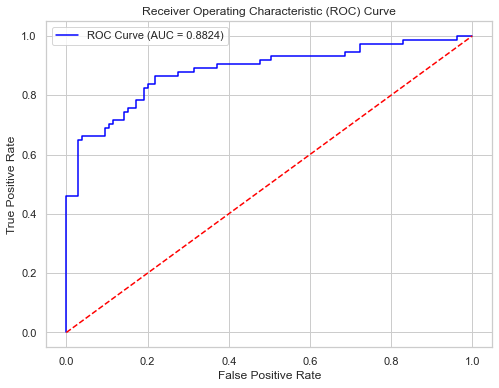

In [36]:
# Plot ROC curve
fpr, tpr, _ = roc_curve(y_val, y_val_proba)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

# Interpretation:

In [37]:
# Retrieve the coefficients and intercept
coefficients = model.coef_[0]
intercept = model.intercept_[0]
feature_names = X_train.columns

In [38]:
# Create a DataFrame to display the coefficients with feature names
coef_df = pd.DataFrame({
    'Feature': feature_names,
    'Coefficient': coefficients
})

In [39]:
# Sort the DataFrame by absolute value of coefficients
coef_df['AbsCoefficient'] = coef_df['Coefficient'].abs()
coef_df = coef_df.sort_values(by='AbsCoefficient', ascending=False)

print(coef_df[['Feature', 'Coefficient']])

    Feature  Coefficient
1       Sex    -2.596708
0    Pclass    -0.930727
3     SibSp    -0.293865
6  Embarked    -0.218849
4     Parch    -0.111821
2       Age    -0.030430
5      Fare     0.002533


In [40]:
from pickle import dump
dump(log_model,open('model.pkl','wb'))